# 01_IHSG_QUARTERLY

### Metadata


1. `Date`: Tanggal pengamatan.
2. `Close Price`: Harga penutup saham pada hari tersebut.
3. `Open Price`: Harga pembukaan saham pada hari tersebut.
4. `High Price`: Harga tertinggi saham pada hari tersebut.
5. `Low Price`: Harga terendah saham pada hari tersebut.
6. `Close Price.1`: Harga penutup saham (mungkin data yang sama dengan 'Close Price').
7. `SMAVG(50)`: Rata-rata bergerak sederhana 50 hari.
8. `SMAVG(100)`: Rata-rata bergerak sederhana 100 hari.
9. `SMAVG(200)`: Rata-rata bergerak sederhana 200 hari.
10. `Volume`: Jumlah saham yang diperdagangkan pada hari tersebut.
11. `Price/Earnings`: Rasio harga terhadap laba bersih.
12. `Price/Earnings before XO, Positive`: Rasio harga terhadap laba bersih sebelum penyesuaian (mungkin saat ada peristiwa tertentu).
13. `Price/Earnings before XO`: Rasio harga terhadap laba bersih sebelum penyesuaian.
14. `Price/Cash Flow`: Rasio harga terhadap aliran kas.
15. `Price/Sales`: Rasio harga terhadap pendapatan penjualan.
16. `Price/Book Value`: Rasio harga terhadap nilai buku.
17. `RSI 14 Day`: Indeks kekuatan relatif untuk 14 hari.
18. `RSI 30 Day`: Indeks kekuatan relatif untuk 30 hari.
19. `RSI 9 Day`: Indeks kekuatan relatif untuk 9 hari.
20. `RSI 3 Day`: Indeks kekuatan relatif untuk 3 hari.
21. `Volatility 10D`: Volatilitas selama 10 hari.
22. `Volatility 30D`: Volatilitas selama 30 hari.
23. `Volatility 60D`: Volatilitas selama 60 hari.
24. `Volatility 90D`: Volatilitas selama 90 hari.
25. `Volatility 180D`: Volatilitas selama 180 hari.
26. `Volatility 360D`: Volatilitas selama 360 hari.
27. `IHSG 1 Day Ago`: Indeks Harga Saham Gabungan (IHSG) satu hari sebelumnya.
28. `Oil Price`: Harga minyak.
29. `Palm Oil Price`: Harga minyak kelapa sawit.
30. `Coal Price`: Harga batu bara.
31. `BI FX Rate`: Nilai tukar Rupiah terhadap mata uang asing (Bank Indonesia).
32. `5Y Bond Yield`: Imbal hasil obligasi 5 tahun.
33. `10Y Bond Yield`: Imbal hasil obligasi 10 tahun.
34. `JIBOR 3M`: Jakarta Interbank Offered Rate (JIBOR) untuk tenor 3 bulan.

### Setup

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

### Load Data

In [3]:
def load_dataset(dataset_root, data_name, time_frame, separator):
    file_path = os.path.join(dataset_root, data_name, time_frame, f"{time_frame}.csv")

    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"The file '{file_path}' does not exist.")

    df = pd.read_csv(file_path, sep = separator)

    return df

In [4]:
DATASET_ROOT = '/content/drive/MyDrive/Data'
data = '01_IHSG'
time_frame = 'Quarterly'

data = load_dataset(DATASET_ROOT, data, time_frame, ',')

In [5]:
data

,Date,3M Total Return - Last Close,Close Price,Volatility 90 Day,Return Sharpe Ratio,Sortino Ratio,Price/Earnings,"Price/Earnings before XO, Positive",Price/Earnings before XO,Price/Cash Flow,Price/Sales,Price/Book Value,Oil Price,Palm Oil Price,Coal Price,BI FX Rate,5Y Bond Yield,10Y Bond Yield,JIBOR 3M
0,12/31/2022,-0.022907,6850.62,10.86,-1.309747,-1.543823,14.77,14.77,14.77,14.77,14.77,14.77,85.91,4171.0,205.55,15731.00,6.20,6.94,6.62
1,9/30/2022,0.021002,7040.80,12.73,0.388394,1.333479,16.97,16.97,16.97,16.97,16.97,16.97,87.96,3327.0,295.00,15247.00,6.72,7.37,5.11
2,6/30/2022,-0.007880,6911.58,15.90,-0.388941,-0.304279,16.63,16.63,16.63,16.63,16.63,16.63,114.81,5088.0,341.65,14848.00,6.13,7.22,3.75
3,3/31/2022,0.069944,7071.44,11.14,2.509907,6.146762,30.37,30.37,30.37,30.37,30.37,30.37,107.91,6391.0,254.35,14349.00,5.62,6.74,3.75
4,12/31/2021,0.050720,6581.48,11.97,1.528893,3.844474,26.95,26.95,26.95,26.95,26.95,26.95,79.32,5150.0,138.00,14265.00,5.10,6.38,3.75
5,9/30/2021,0.053831,6286.94,12.46,1.600953,3.930730,28.61,28.61,28.61,28.61,28.61,28.61,78.52,4833.0,200.50,14307.00,5.14,6.26,3.75
6,6/30/2021,-0.000945,5985.49,13.32,-0.317482,-0.057127,31.55,31.55,31.55,31.55,31.55,31.55,75.13,3782.0,114.85,14496.00,5.40,6.59,3.75
7,3/31/2021,-0.017800,5985.52,18.38,-0.633272,-0.844121,31.58,31.58,31.58,31.58,31.58,31.58,63.54,4061.0,96.85,14572.00,5.91,6.78,3.75
8,12/31/2020,0.230064,5979.07,20.14,7.347482,17.594852,31.86,31.86,31.86,31.86,31.86,31.86,51.34,3878.0,87.65,14105.01,5.21,5.89,4.06
9,9/30/2020,-0.003248,4870.04,20.45,-0.293756,-0.114966,20.52,20.52,20.52,20.52,20.52,20.52,40.95,2839.0,62.25,14918.00,5.73,6.96,4.30


In [6]:
# Step 1: Check the column names
print("Column names before:", data.columns)

# If there are leading or trailing spaces, remove them from column names
data.columns = data.columns.str.strip()

# Step 2: Check the column names after stripping spaces
print("Column names after:", data.columns)

Column names before: Index(['Date', '3M Total Return - Last Close', 'Close Price ',
       'Volatility 90 Day', 'Return Sharpe Ratio', ' Sortino Ratio ',
       'Price/Earnings', 'Price/Earnings before XO, Positive',
       'Price/Earnings before XO', 'Price/Cash Flow', 'Price/Sales',
       'Price/Book Value', 'Oil Price', 'Palm Oil Price', 'Coal Price',
       'BI FX Rate', '5Y Bond Yield', '10Y Bond Yield', 'JIBOR 3M'],
      dtype='object')
Column names after: Index(['Date', '3M Total Return - Last Close', 'Close Price',
       'Volatility 90 Day', 'Return Sharpe Ratio', 'Sortino Ratio',
       'Price/Earnings', 'Price/Earnings before XO, Positive',
       'Price/Earnings before XO', 'Price/Cash Flow', 'Price/Sales',
       'Price/Book Value', 'Oil Price', 'Palm Oil Price', 'Coal Price',
       'BI FX Rate', '5Y Bond Yield', '10Y Bond Yield', 'JIBOR 3M'],
      dtype='object')


### Checking null values

In [7]:
# Check the percentage of Nan in dataset
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / len(data)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Price/Cash Flow,1,0.02439
Price/Earnings,1,0.02439
"Price/Earnings before XO, Positive",1,0.02439
Price/Earnings before XO,1,0.02439
Price/Sales,1,0.02439
Price/Book Value,1,0.02439
Oil Price,0,0.00000
10Y Bond Yield,0,0.00000
5Y Bond Yield,0,0.00000
BI FX Rate,0,0.00000


### Data Preprocessing

In [8]:
# Mengonversi kolom 'Date' menjadi tipe data datetime
data['Date'] = pd.to_datetime(data['Date'])

df = data.copy()

# Menjadikan kolom 'Date' sebagai indeks
df.set_index('Date', inplace=True)
df

,3M Total Return - Last Close,Close Price,Volatility 90 Day,Return Sharpe Ratio,Sortino Ratio,Price/Earnings,"Price/Earnings before XO, Positive",Price/Earnings before XO,Price/Cash Flow,Price/Sales,Price/Book Value,Oil Price,Palm Oil Price,Coal Price,BI FX Rate,5Y Bond Yield,10Y Bond Yield,JIBOR 3M
Date,,,,,,,,,,,,,,,,,,
2022-12-31,-0.022907,6850.62,10.86,-1.309747,-1.543823,14.77,14.77,14.77,14.77,14.77,14.77,85.91,4171.0,205.55,15731.00,6.20,6.94,6.62
2022-09-30,0.021002,7040.80,12.73,0.388394,1.333479,16.97,16.97,16.97,16.97,16.97,16.97,87.96,3327.0,295.00,15247.00,6.72,7.37,5.11
2022-06-30,-0.007880,6911.58,15.90,-0.388941,-0.304279,16.63,16.63,16.63,16.63,16.63,16.63,114.81,5088.0,341.65,14848.00,6.13,7.22,3.75
2022-03-31,0.069944,7071.44,11.14,2.509907,6.146762,30.37,30.37,30.37,30.37,30.37,30.37,107.91,6391.0,254.35,14349.00,5.62,6.74,3.75
2021-12-31,0.050720,6581.48,11.97,1.528893,3.844474,26.95,26.95,26.95,26.95,26.95,26.95,79.32,5150.0,138.00,14265.00,5.10,6.38,3.75
2021-09-30,0.053831,6286.94,12.46,1.600953,3.930730,28.61,28.61,28.61,28.61,28.61,28.61,78.52,4833.0,200.50,14307.00,5.14,6.26,3.75
2021-06-30,-0.000945,5985.49,13.32,-0.317482,-0.057127,31.55,31.55,31.55,31.55,31.55,31.55,75.13,3782.0,114.85,14496.00,5.40,6.59,3.75
2021-03-31,-0.017800,5985.52,18.38,-0.633272,-0.844121,31.58,31.58,31.58,31.58,31.58,31.58,63.54,4061.0,96.85,14572.00,5.91,6.78,3.75
2020-12-31,0.230064,5979.07,20.14,7.347482,17.594852,31.86,31.86,31.86,31.86,31.86,31.86,51.34,3878.0,87.65,14105.01,5.21,5.89,4.06


### Handling Missing Values

In [9]:
def fillna_zero_selected_columns(df, columns):
    """
    Mengisi nilai NaN dengan nilai 0 untuk kolom yang dipilih dalam DataFrame.
    """
    return df.fillna({column: 0 for column in columns})

# Specify the columns to fill NaN with 0
selected_columns = ['News Publication', 'News Positive Sentiment', 'News Negative Sentiment', 'Twitter Publication', 'Twitter Positive Sentiment', 'Twitter Negative Sentiment']

# Fill NaN with 0 for the selected columns
df = fillna_zero_selected_columns(df, selected_columns)

In [10]:
def drop_columns_with_all_missing(df):
    # Menghapus kolom yang memiliki 100% missing value
    df_cleaned = df.dropna(axis=1, how='all')
    return df_cleaned
df = drop_columns_with_all_missing(df)

In [11]:
# Check the percentage of Nan in dfset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Price/Sales,1,0.02439
Price/Earnings,1,0.02439
"Price/Earnings before XO, Positive",1,0.02439
Price/Earnings before XO,1,0.02439
Price/Cash Flow,1,0.02439
Price/Book Value,1,0.02439
Palm Oil Price,0,0.00000
10Y Bond Yield,0,0.00000
5Y Bond Yield,0,0.00000
BI FX Rate,0,0.00000


In [12]:
def handle_missing_values(df, column_name, method='ffill'):
    # Calculate the number of missing values before filling
    before_fill_count = df[column_name].isnull().sum()

    # Fill missing values using the specified method (default: forward fill)
    df[column_name] = df[column_name].fillna(method=method)

    # Calculate the number of missing values after filling
    after_fill_count = df[column_name].isnull().sum()

    # Print a summary of the missing value handling
    print(f"Handling missing values for '{column_name}':")
    print(f"Before filling: {before_fill_count} missing values")
    print(f"After filling: {after_fill_count} missing values")

    # Create boxplot and histogram for the column
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.boxplot(df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.xlabel(column_name)

    plt.subplot(1, 2, 2)
    plt.hist(df[column_name])
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)

    plt.show()

In [13]:
# Memeriksa apakah ada nilai yang hilang pada baris pertama
first_row_has_missing = df.iloc[0].isnull().any()

if first_row_has_missing:
    print("Ada nilai yang hilang pada baris pertama.")
else:
    print("Tidak ada nilai yang hilang pada baris pertama.")

Tidak ada nilai yang hilang pada baris pertama.


In [14]:
def fill_missing_values_first_row(df):
    # Iterasi melalui setiap kolom dalam DataFrame
    for column in df.columns:
        # Memeriksa apakah ada nilai yang hilang pada baris pertama kolom tertentu
        if pd.isnull(df.at[df.index[0], column]):
            # Mencari nilai terdekat yang tidak hilang (tidak NaN)
            nearest_value = df[column].dropna().iloc[0]
            # Menggantikan nilai yang hilang di baris pertama dengan nilai terdekat
            df.at[df.index[0], column] = nearest_value
    return df

In [15]:
df = fill_missing_values_first_row(df)
df

,3M Total Return - Last Close,Close Price,Volatility 90 Day,Return Sharpe Ratio,Sortino Ratio,Price/Earnings,"Price/Earnings before XO, Positive",Price/Earnings before XO,Price/Cash Flow,Price/Sales,Price/Book Value,Oil Price,Palm Oil Price,Coal Price,BI FX Rate,5Y Bond Yield,10Y Bond Yield,JIBOR 3M
Date,,,,,,,,,,,,,,,,,,
2022-12-31,-0.022907,6850.62,10.86,-1.309747,-1.543823,14.77,14.77,14.77,14.77,14.77,14.77,85.91,4171.0,205.55,15731.00,6.20,6.94,6.62
2022-09-30,0.021002,7040.80,12.73,0.388394,1.333479,16.97,16.97,16.97,16.97,16.97,16.97,87.96,3327.0,295.00,15247.00,6.72,7.37,5.11
2022-06-30,-0.007880,6911.58,15.90,-0.388941,-0.304279,16.63,16.63,16.63,16.63,16.63,16.63,114.81,5088.0,341.65,14848.00,6.13,7.22,3.75
2022-03-31,0.069944,7071.44,11.14,2.509907,6.146762,30.37,30.37,30.37,30.37,30.37,30.37,107.91,6391.0,254.35,14349.00,5.62,6.74,3.75
2021-12-31,0.050720,6581.48,11.97,1.528893,3.844474,26.95,26.95,26.95,26.95,26.95,26.95,79.32,5150.0,138.00,14265.00,5.10,6.38,3.75
2021-09-30,0.053831,6286.94,12.46,1.600953,3.930730,28.61,28.61,28.61,28.61,28.61,28.61,78.52,4833.0,200.50,14307.00,5.14,6.26,3.75
2021-06-30,-0.000945,5985.49,13.32,-0.317482,-0.057127,31.55,31.55,31.55,31.55,31.55,31.55,75.13,3782.0,114.85,14496.00,5.40,6.59,3.75
2021-03-31,-0.017800,5985.52,18.38,-0.633272,-0.844121,31.58,31.58,31.58,31.58,31.58,31.58,63.54,4061.0,96.85,14572.00,5.91,6.78,3.75
2020-12-31,0.230064,5979.07,20.14,7.347482,17.594852,31.86,31.86,31.86,31.86,31.86,31.86,51.34,3878.0,87.65,14105.01,5.21,5.89,4.06


Handling Price/Sales ....
Handling missing values for 'Price/Sales':
Before filling: 1 missing values
After filling: 0 missing values


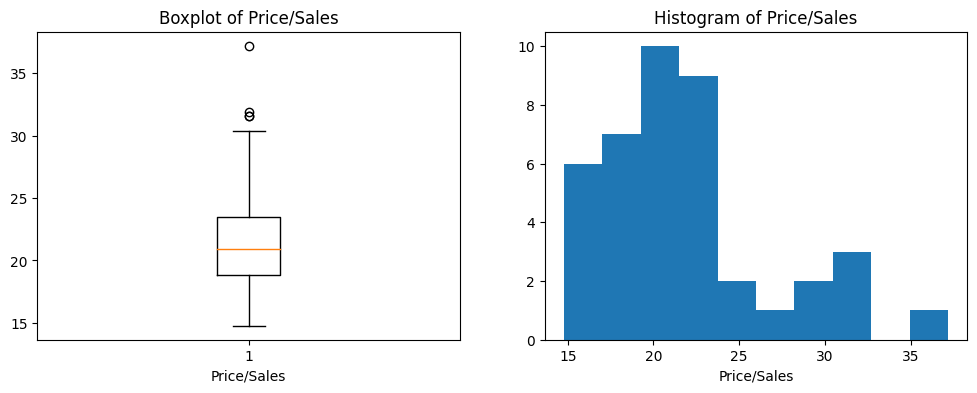



Handling Price/Earnings ....
Handling missing values for 'Price/Earnings':
Before filling: 1 missing values
After filling: 0 missing values


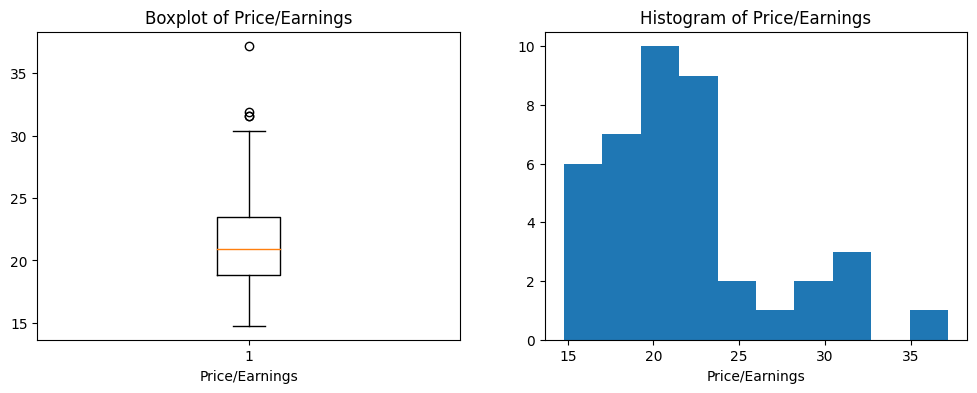



Handling Price/Earnings before XO, Positive ....
Handling missing values for 'Price/Earnings before XO, Positive':
Before filling: 1 missing values
After filling: 0 missing values


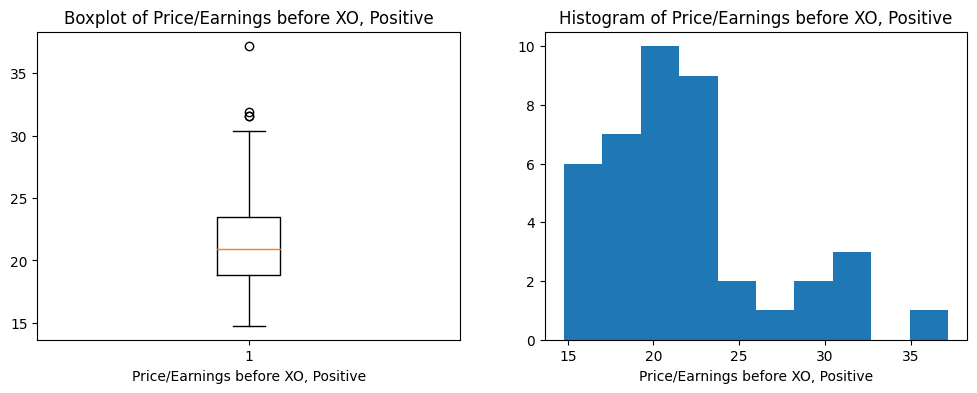



Handling Price/Earnings before XO ....
Handling missing values for 'Price/Earnings before XO':
Before filling: 1 missing values
After filling: 0 missing values


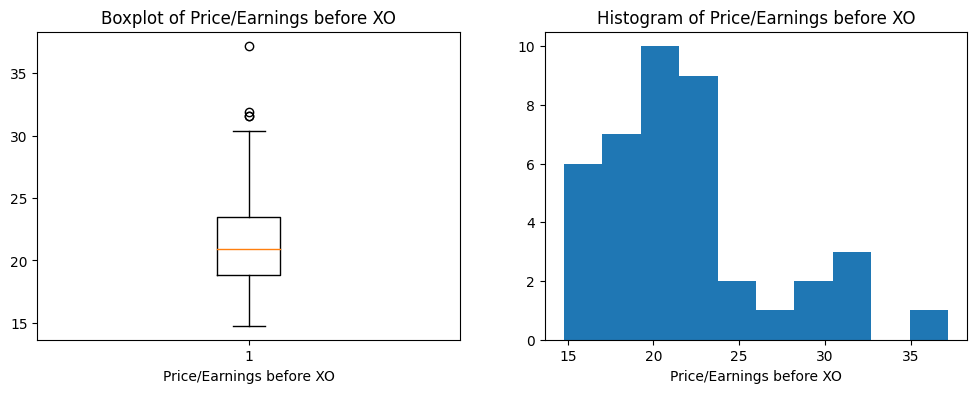



Handling Price/Cash Flow ....
Handling missing values for 'Price/Cash Flow':
Before filling: 1 missing values
After filling: 0 missing values


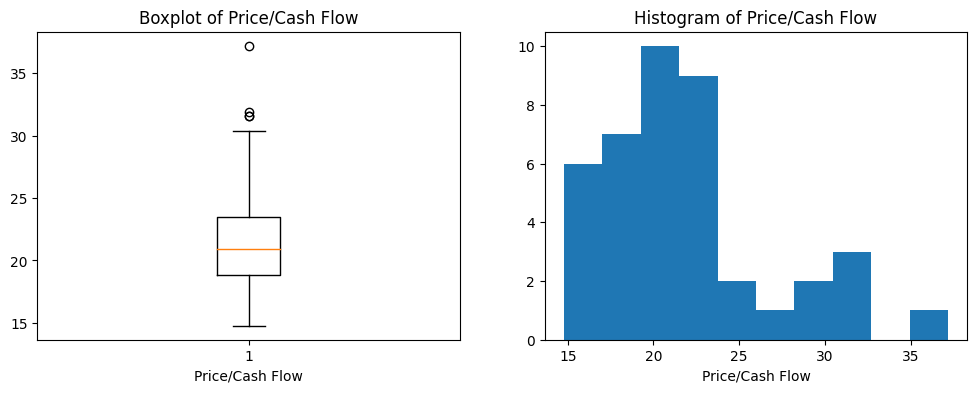



Handling Price/Book Value ....
Handling missing values for 'Price/Book Value':
Before filling: 1 missing values
After filling: 0 missing values


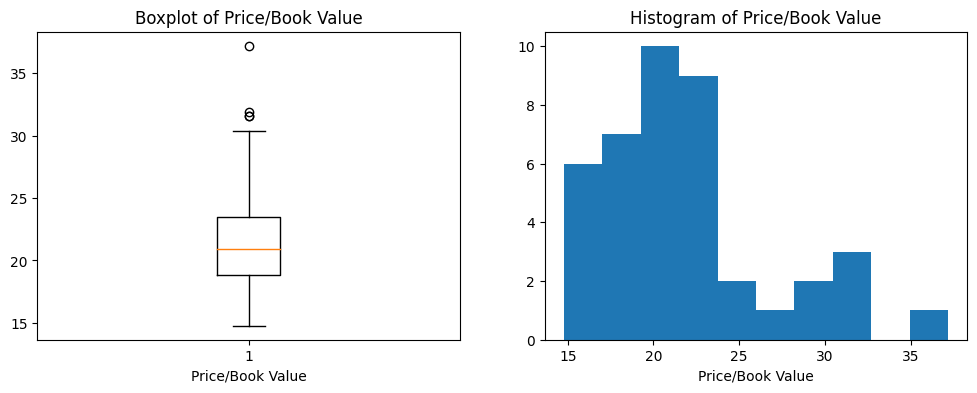

In [16]:
columns_with_missing_values = missing_data[missing_data['Total'] > 0].index.tolist()

# Apply the missing value handling function to each column
for column in columns_with_missing_values:
    print(f"Handling {column} ....")
    handle_missing_values(df, column)
    print("\n")

In [17]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(data)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
3M Total Return - Last Close,0,0.0
Close Price,0,0.0
10Y Bond Yield,0,0.0
5Y Bond Yield,0,0.0
BI FX Rate,0,0.0
Coal Price,0,0.0
Palm Oil Price,0,0.0
Oil Price,0,0.0
Price/Book Value,0,0.0
Price/Sales,0,0.0


### Visualization

In [18]:
# Step 1: Check the column names
print("Column names before:", df.columns)

# If there are leading or trailing spaces, remove them from column names
df.columns = df.columns.str.strip()

# Step 2: Check the column names after stripping spaces
print("Column names after:", df.columns)

Column names before: Index(['3M Total Return - Last Close', 'Close Price', 'Volatility 90 Day',
       'Return Sharpe Ratio', 'Sortino Ratio', 'Price/Earnings',
       'Price/Earnings before XO, Positive', 'Price/Earnings before XO',
       'Price/Cash Flow', 'Price/Sales', 'Price/Book Value', 'Oil Price',
       'Palm Oil Price', 'Coal Price', 'BI FX Rate', '5Y Bond Yield',
       '10Y Bond Yield', 'JIBOR 3M'],
      dtype='object')
Column names after: Index(['3M Total Return - Last Close', 'Close Price', 'Volatility 90 Day',
       'Return Sharpe Ratio', 'Sortino Ratio', 'Price/Earnings',
       'Price/Earnings before XO, Positive', 'Price/Earnings before XO',
       'Price/Cash Flow', 'Price/Sales', 'Price/Book Value', 'Oil Price',
       'Palm Oil Price', 'Coal Price', 'BI FX Rate', '5Y Bond Yield',
       '10Y Bond Yield', 'JIBOR 3M'],
      dtype='object')


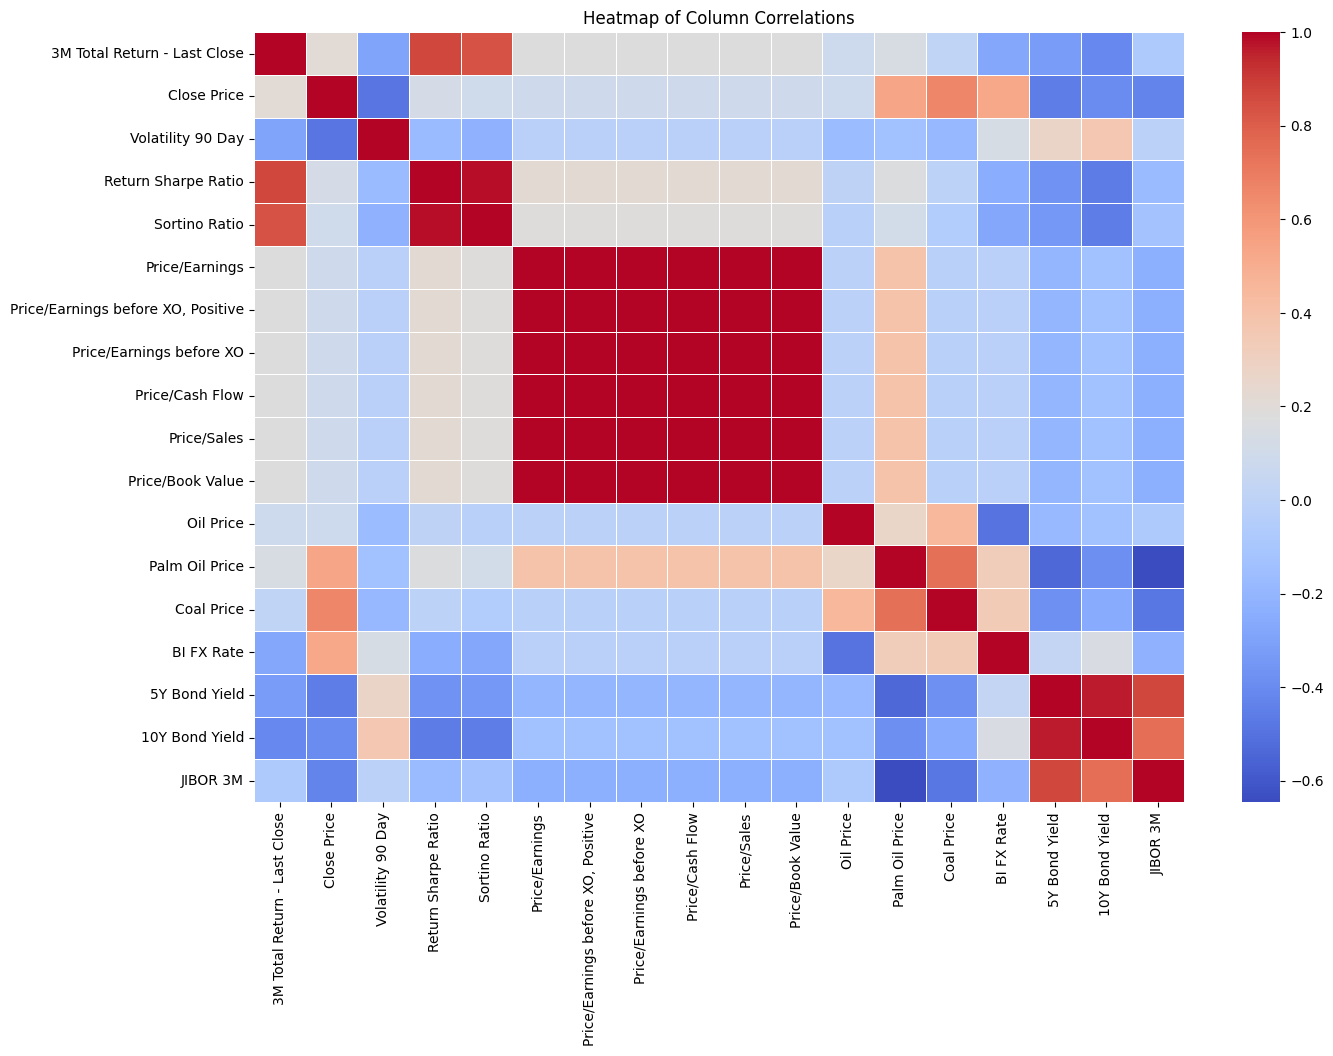

In [19]:
def visualize_heatmap(df):

    # Menghitung matriks korelasi
    correlation_matrix = df.corr()

    # Menentukan ukuran gambar
    plt.figure(figsize=(15, 10))

    # Menampilkan heatmap
    sns.heatmap(correlation_matrix,  cmap='coolwarm', fmt='.2f', linewidths=0.5)

    # Menyesuaikan tata letak
    plt.title('Heatmap of Column Correlations')
    plt.show()

# Panggil fungsi untuk menampilkan heatmap
visualize_heatmap(df)

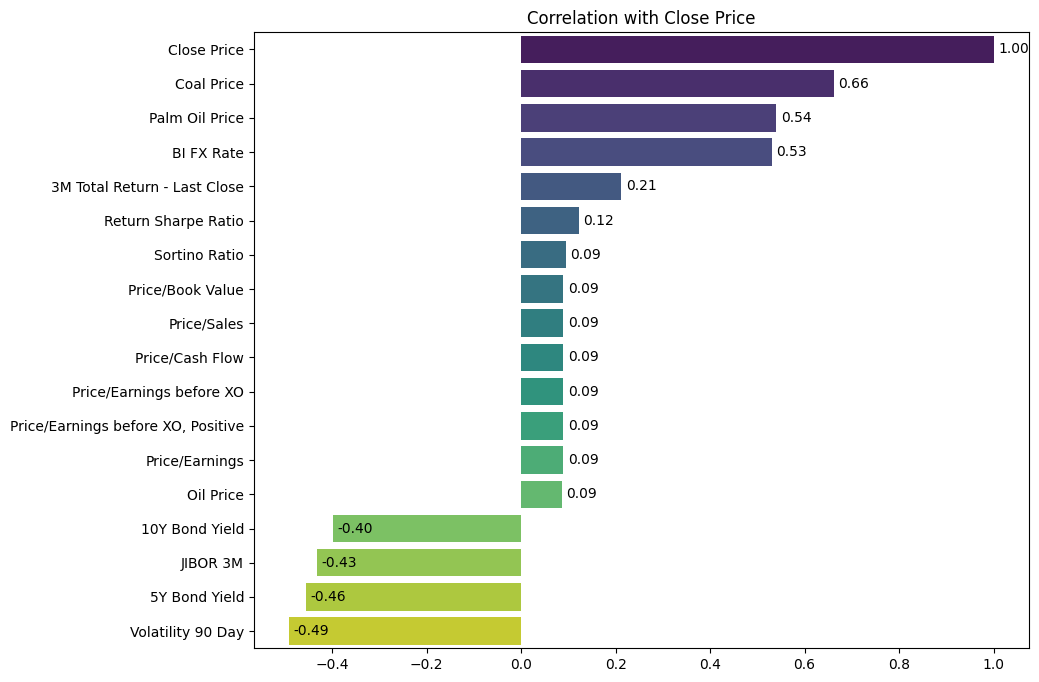

In [20]:
def visualize_target_correlation(df, target_column='Close Price'):
    # Menghitung matriks korelasi antara target_column dan semua kolom lain
    correlation_with_target = df.corr()[target_column].sort_values(ascending=False)

    # Menentukan ukuran gambar
    plt.figure(figsize=(10, 8))

    # Menampilkan bar plot korelasi dengan menambahkan nilai korelasi
    sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')

    # Menambahkan nilai korelasi pada setiap bar
    for i, value in enumerate(correlation_with_target.values):
        plt.text(value + 0.01, i, f'{value:.2f}', va='center', fontsize=10)

    # Menyesuaikan tata letak
    plt.title(f'Correlation with {target_column}')
    plt.show()

# Panggil fungsi untuk menampilkan korelasi dengan 'Close Price'
visualize_target_correlation(df)

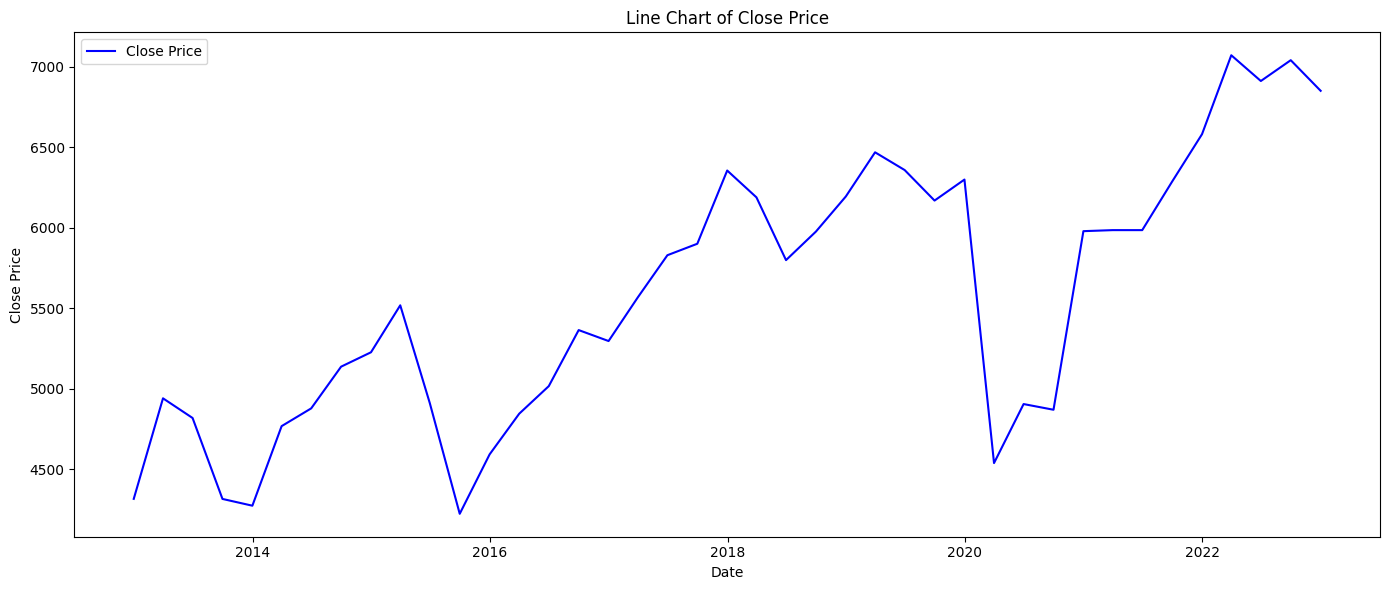

In [21]:
def visualize_close_price_line_chart(df, target_column='Close Price'):
    # Menentukan ukuran gambar
    plt.figure(figsize=(14, 6))

    # Membuat line chart untuk 'Close Price'
    plt.plot(df.index, df[target_column], label=target_column, color='blue', linestyle='-')

    # Menambahkan label dan judul
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.title(f'Line Chart of {target_column}')

    # Menambahkan legenda
    plt.legend()

    # Menyesuaikan tata letak
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk membuat line chart dari 'Close Price'
visualize_close_price_line_chart(df)

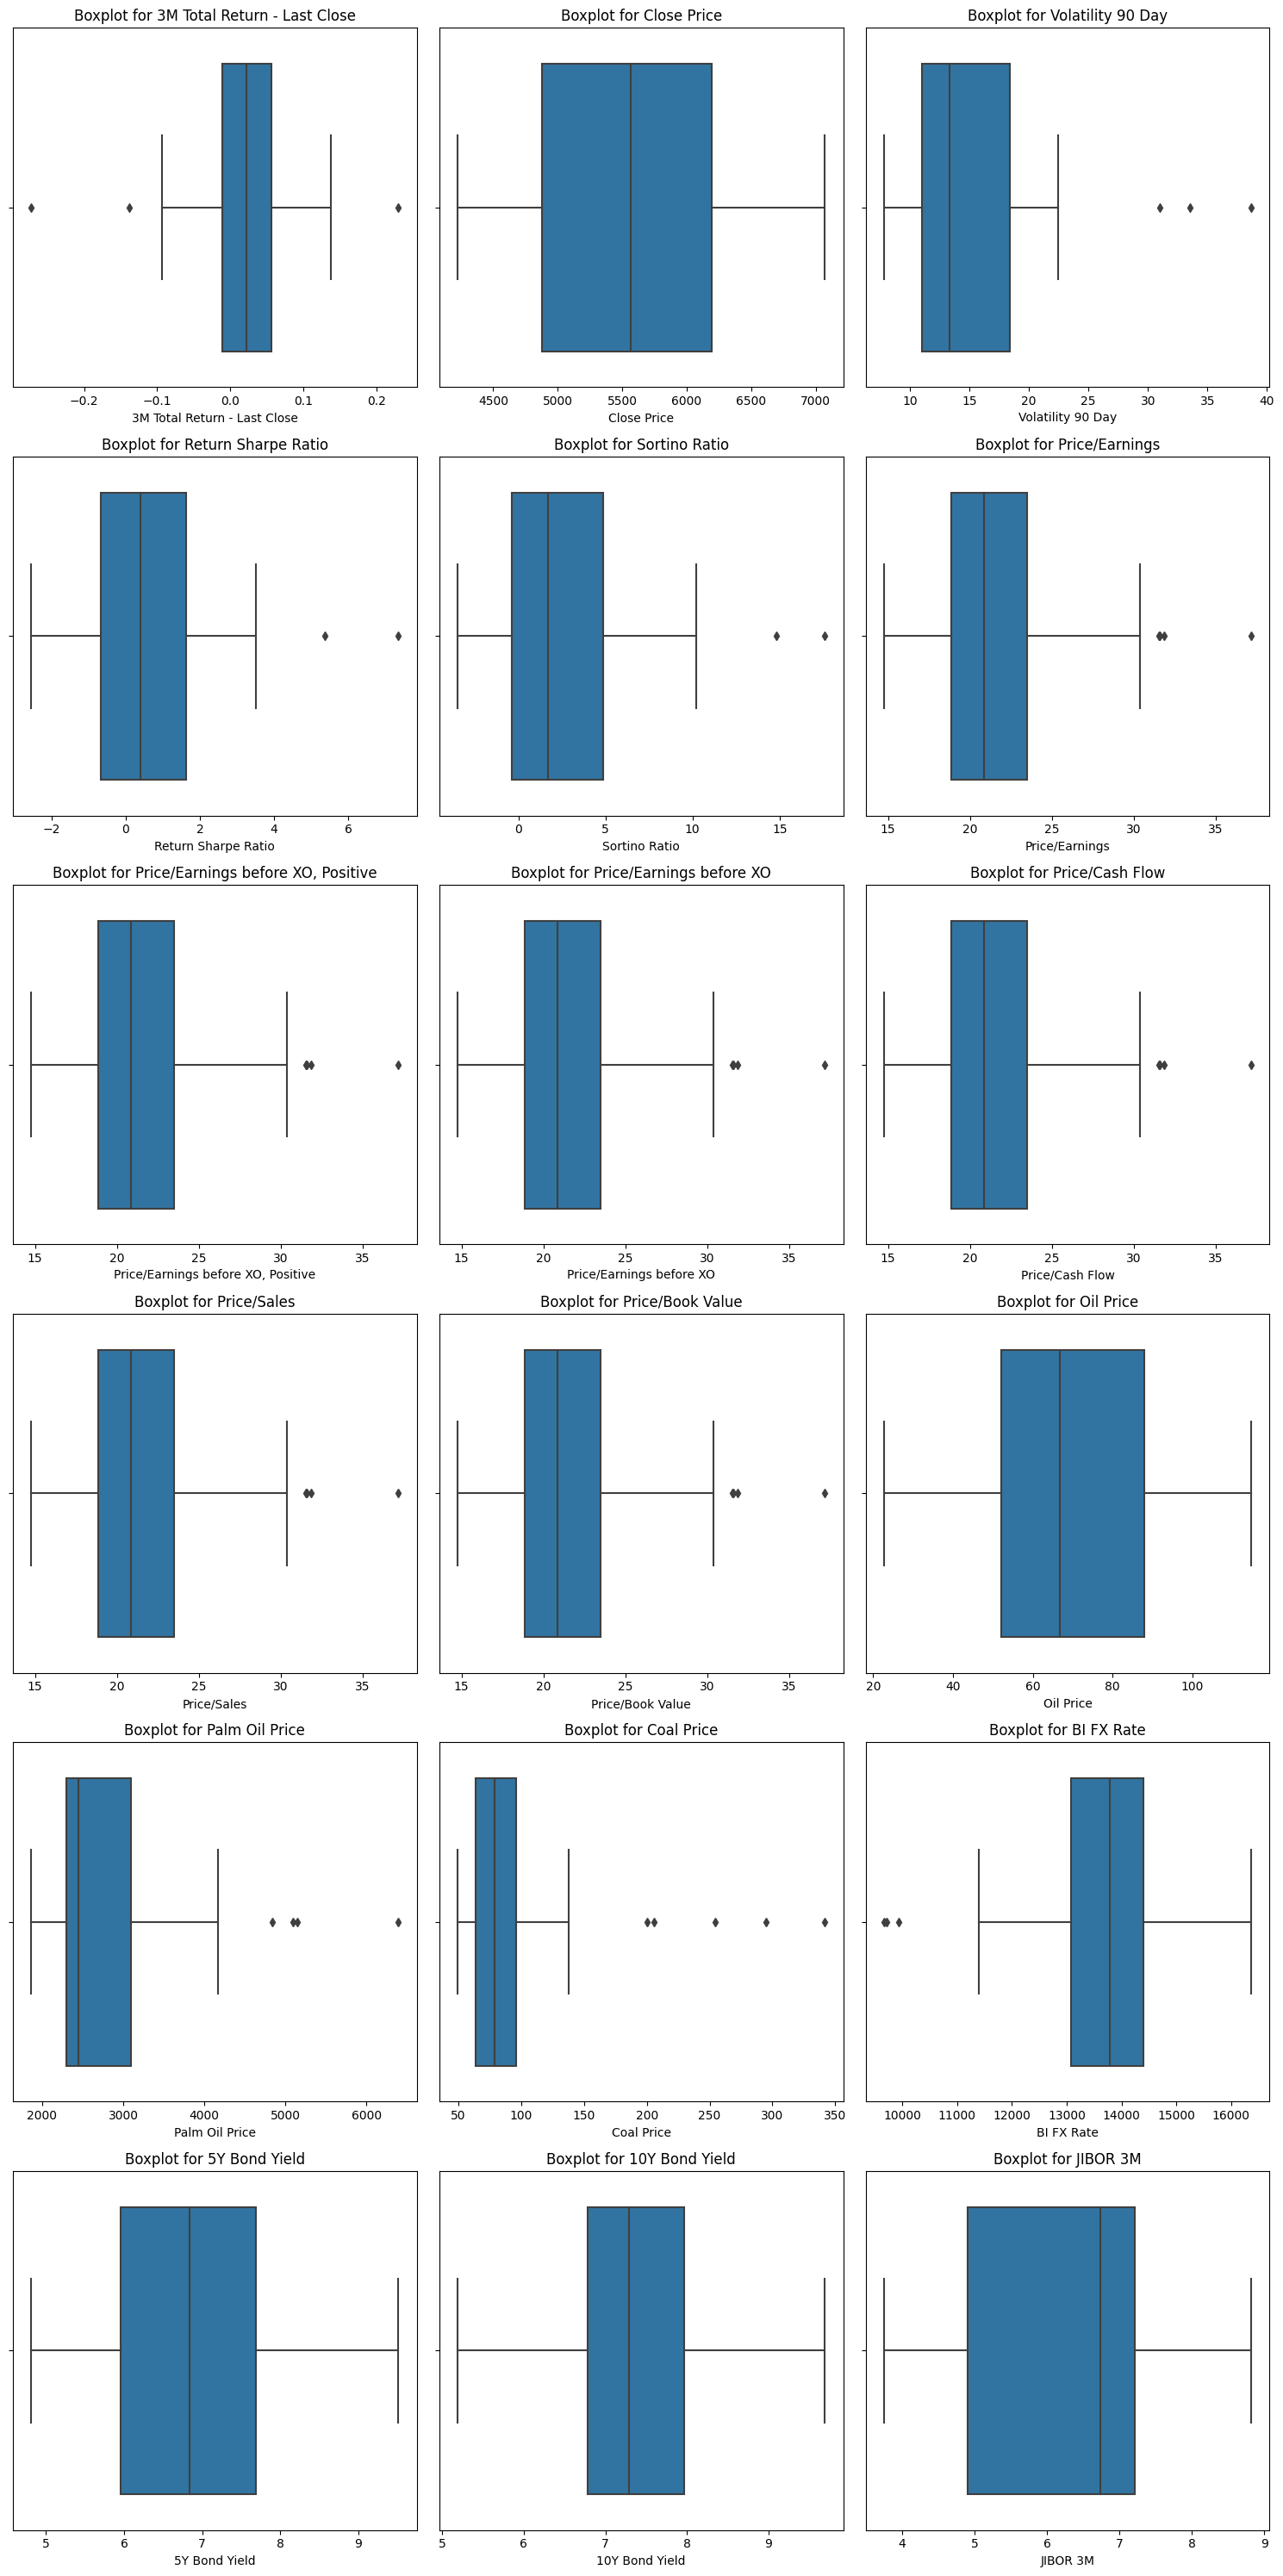

In [22]:
def visualize_boxplots(df):
    # Menentukan jumlah kolom dan baris untuk tata letak grid
    num_columns = df.shape[1]
    num_rows = (num_columns // 3) + (1 if num_columns % 3 > 0 else 0)

    # Menentukan ukuran gambar berdasarkan jumlah kolom
    plt.figure(figsize=(15, 5 * num_rows))

    # Menampilkan boxplot satu per satu
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')

    # Menyesuaikan tata letak
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan boxplot satu per satu
visualize_boxplots(df)

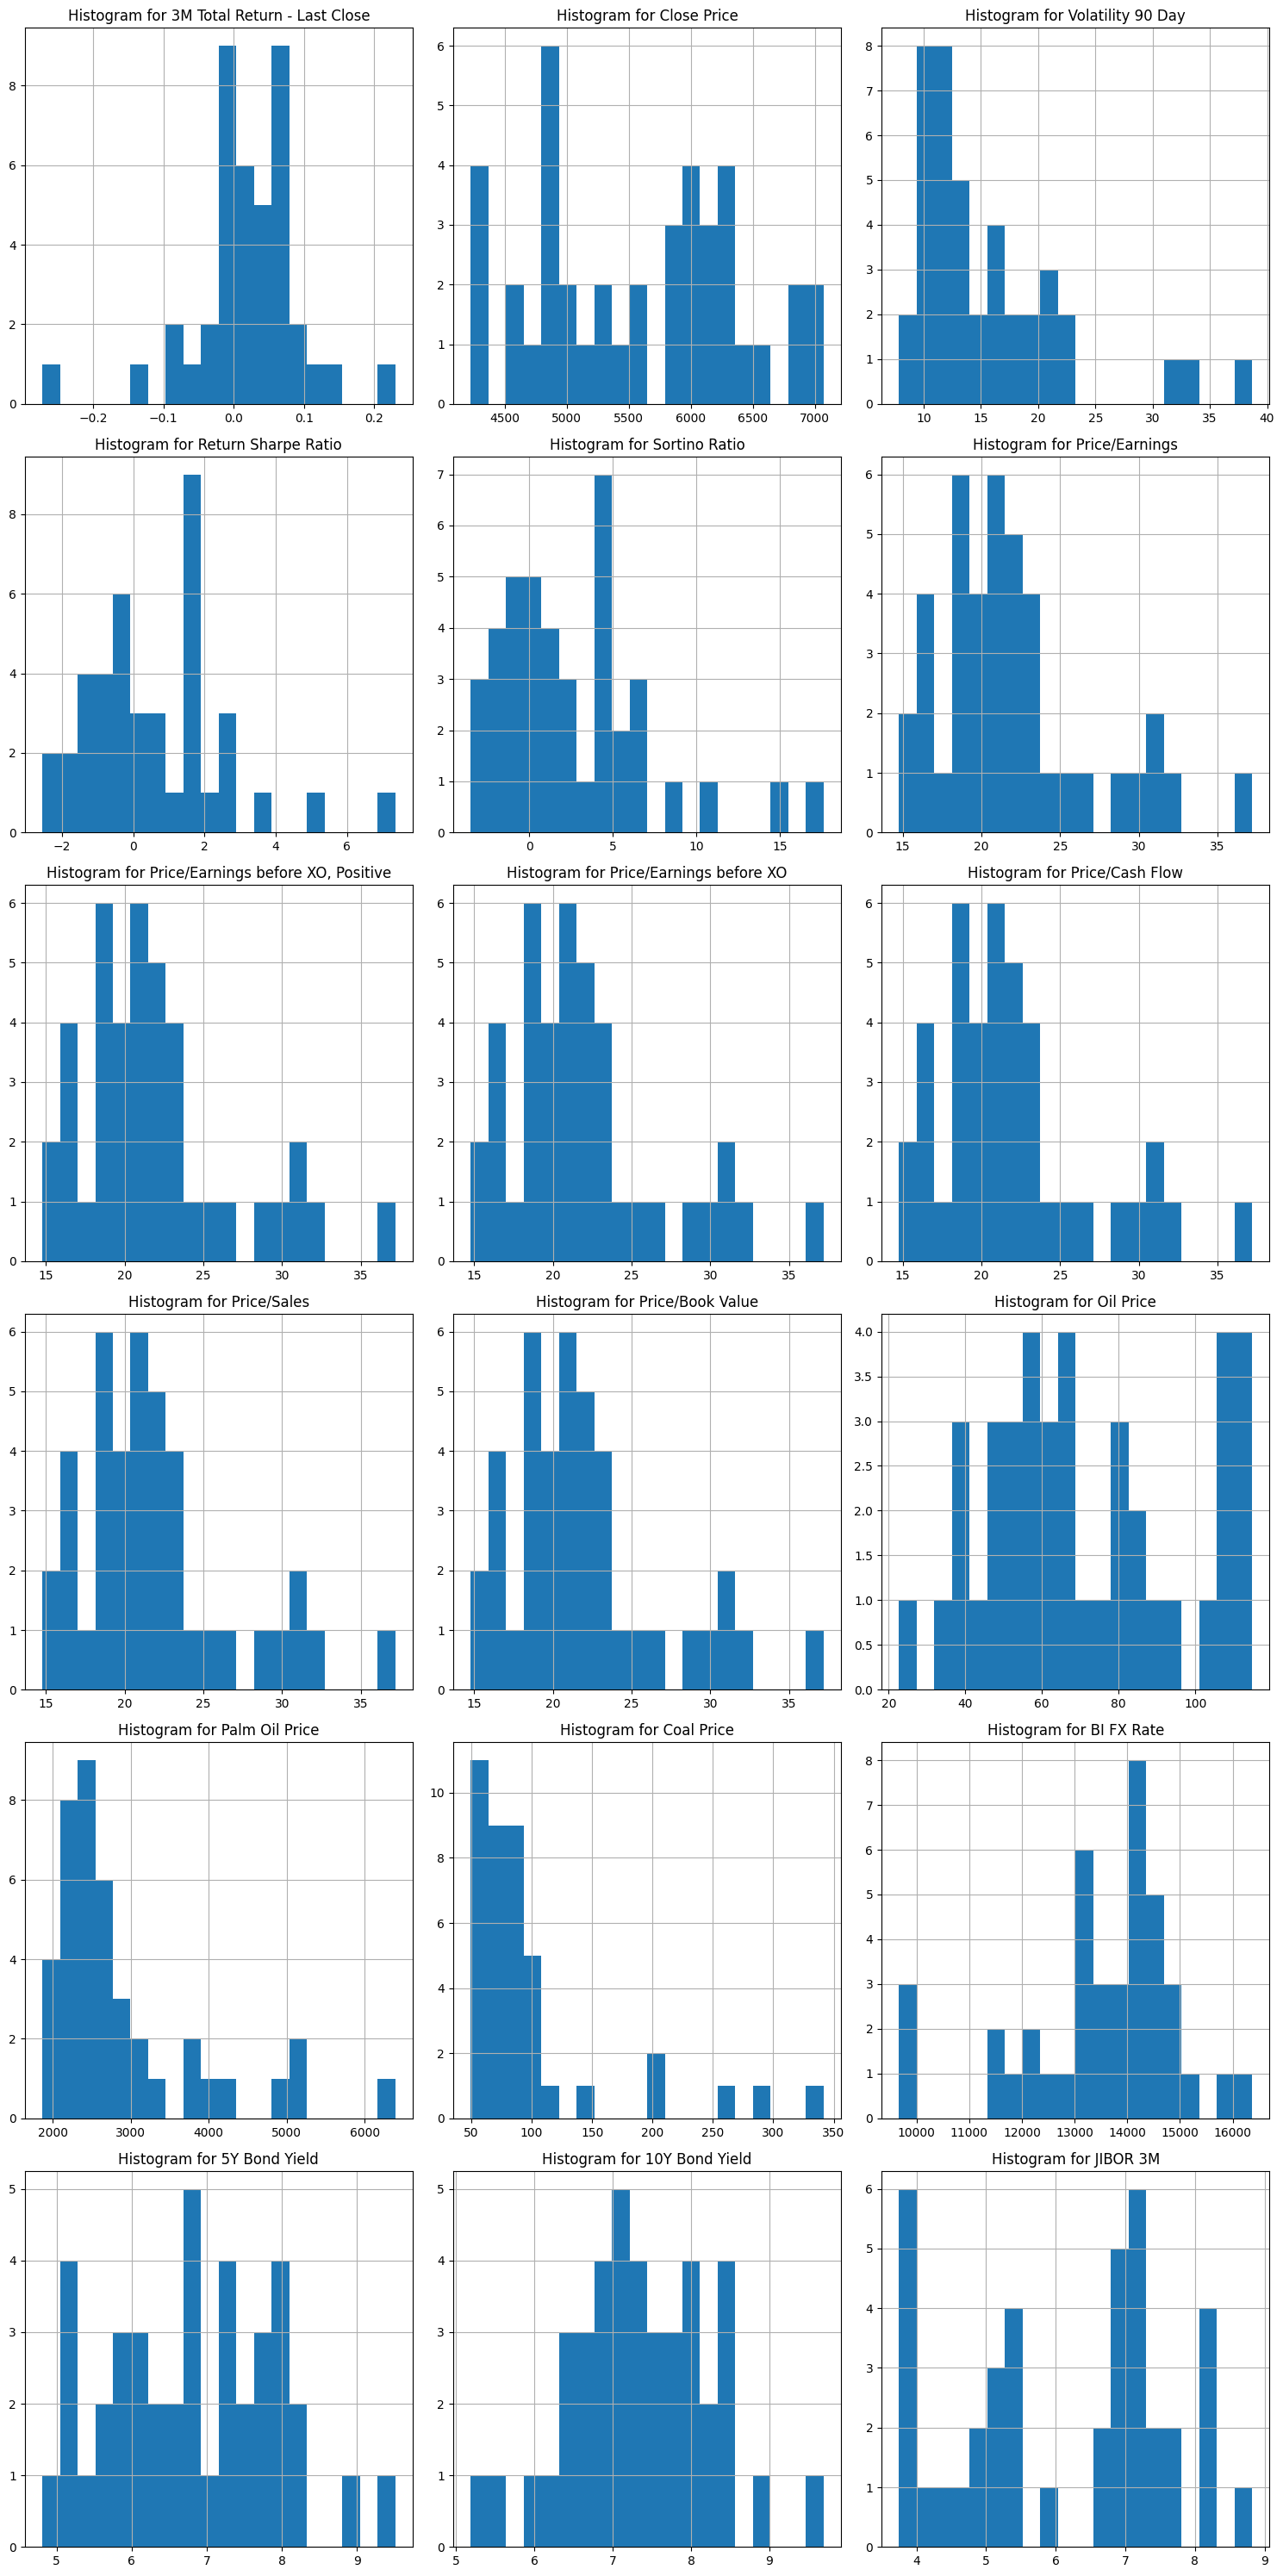

In [23]:
def visualize_histograms(df):
    # Menentukan jumlah kolom dan baris untuk tata letak grid
    num_columns = df.shape[1]
    num_rows = (num_columns // 3) + (1 if num_columns % 3 > 0 else 0)

    # Menentukan ukuran gambar berdasarkan jumlah kolom
    plt.figure(figsize=(15, 5 * num_rows))

    # Menampilkan histogram satu per satu
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, 3, i)
        df[column].hist(bins=20)
        plt.title(f'Histogram for {column}')

    # Menyesuaikan tata letak
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan histogram satu per satu
visualize_histograms(df)

<Figure size 1500x1500 with 0 Axes>

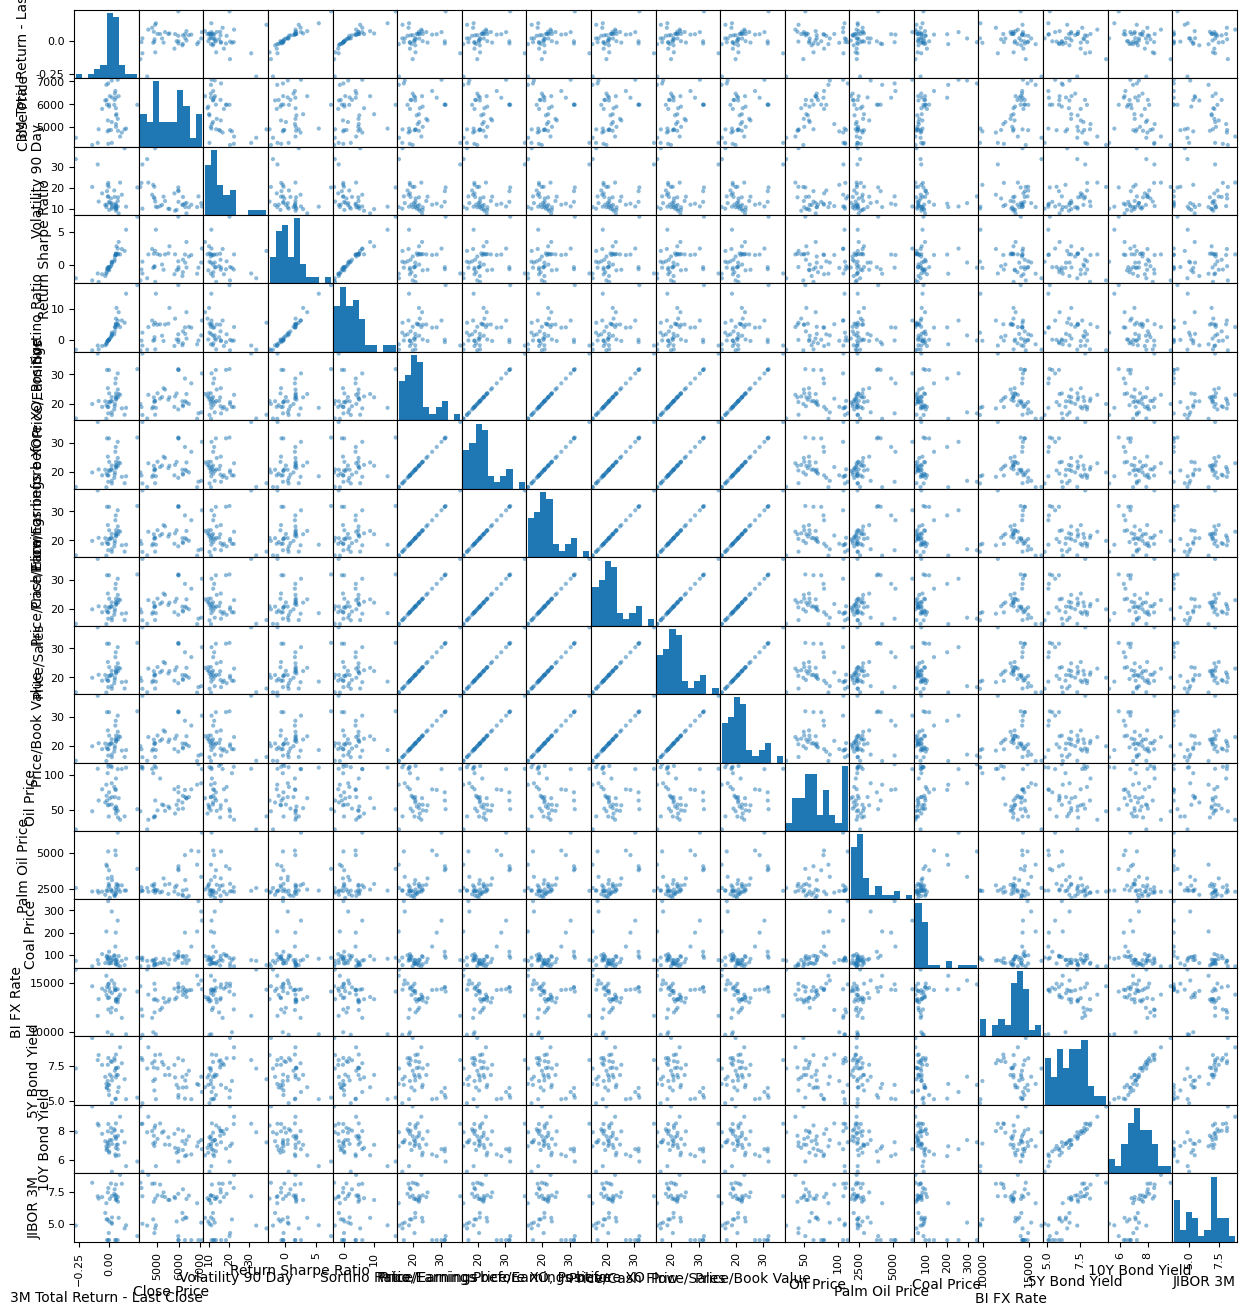

In [24]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Scatterplot Matrix
plt.figure(figsize=(15, 15))
scatter_matrix(df, figsize=(15, 16))
plt.show()


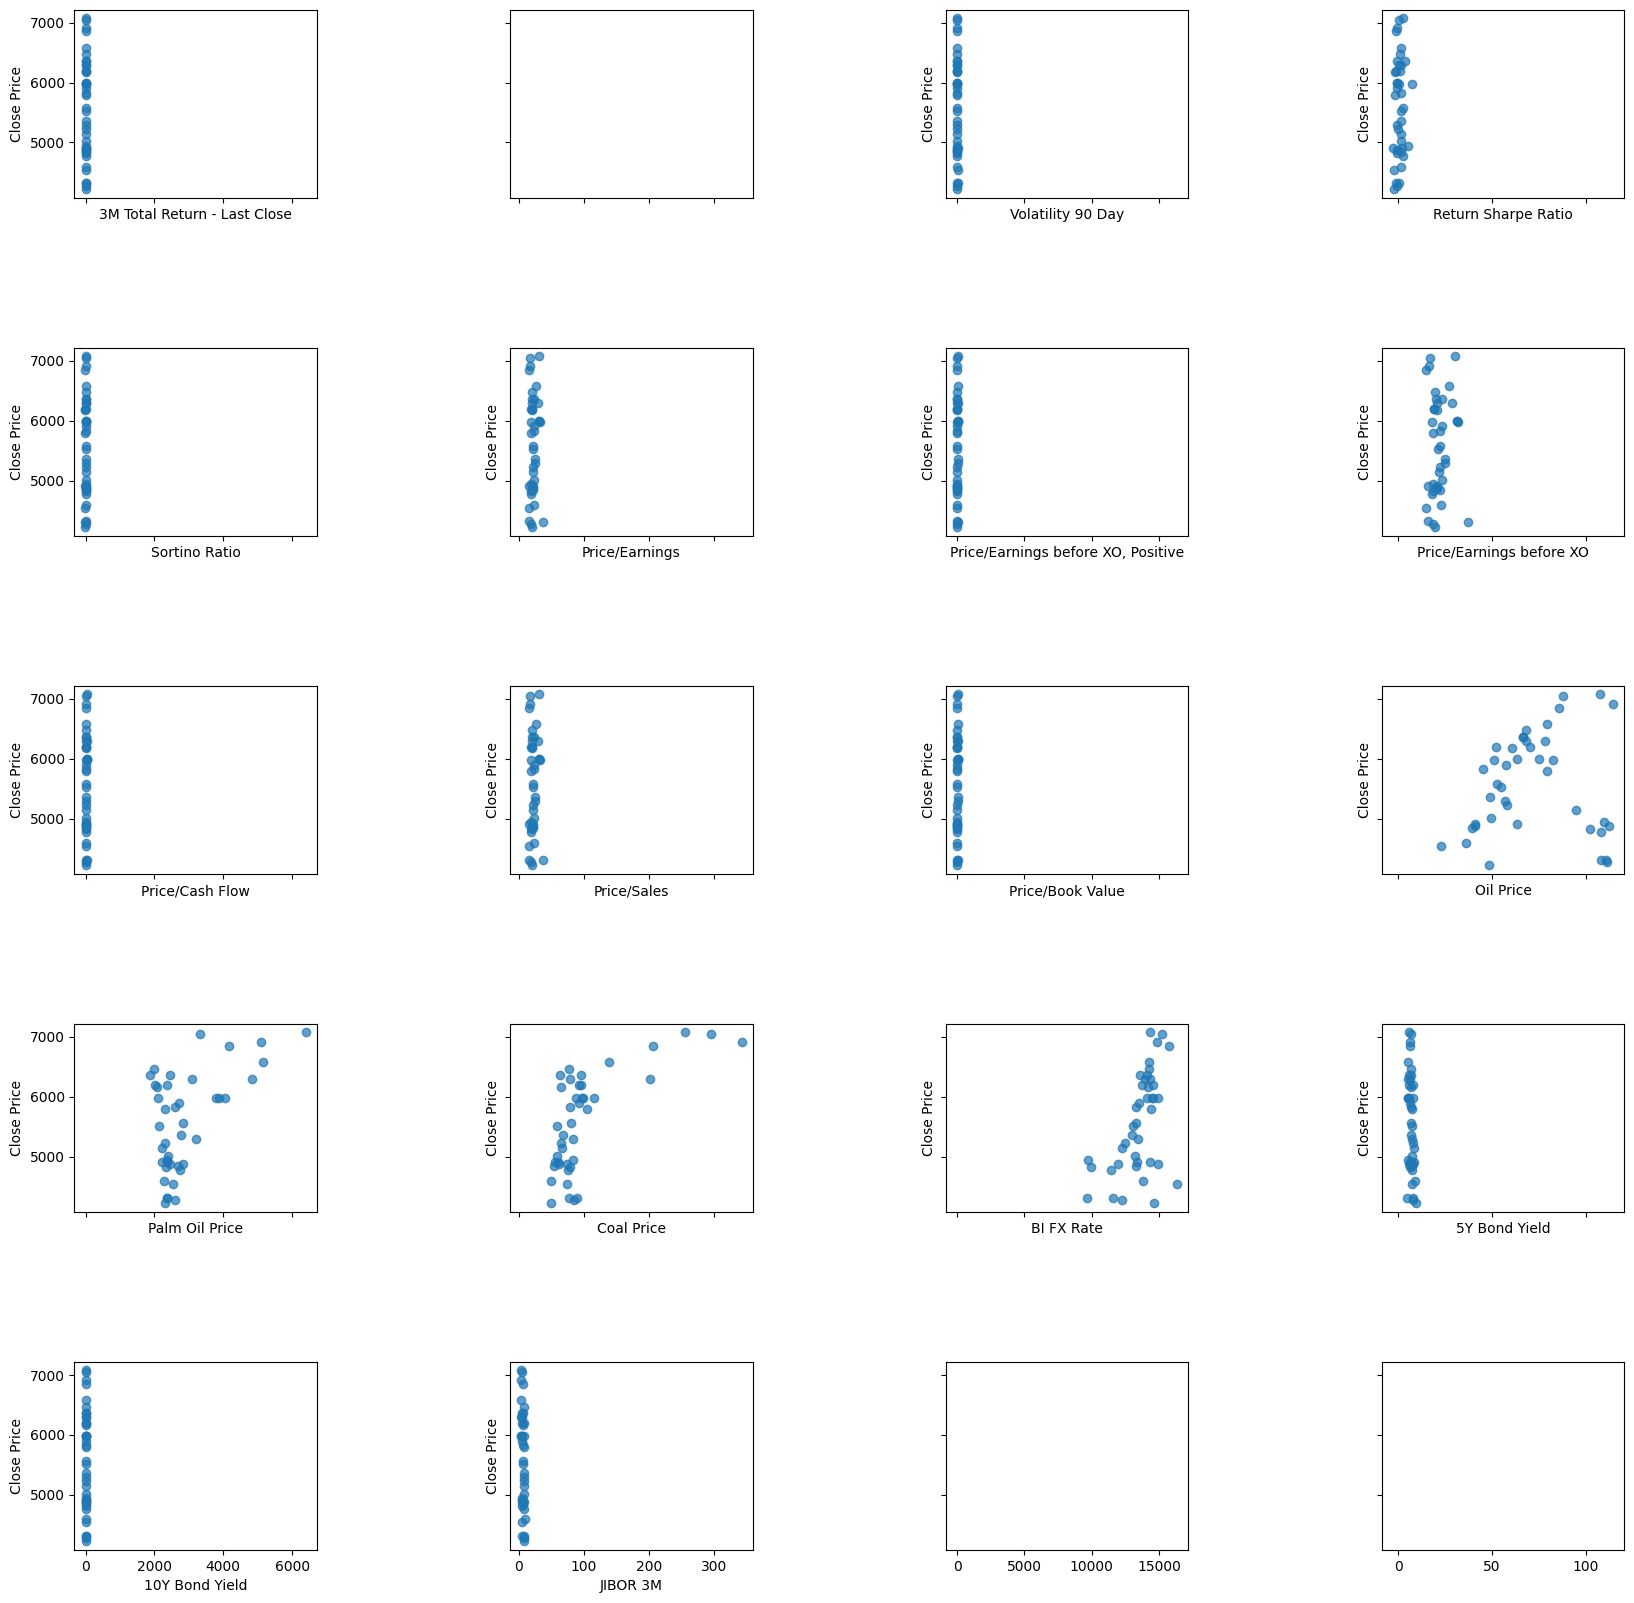

In [25]:
import itertools

def scatter_plot_target_vs_features(df, target_column="Close Price", figsize=(20, 20), columns_per_row=4):
    # Mengambil list nama kolom dari DataFrame
    columns = df.columns

    # Set rasio aspek pada rcParams
    plt.rcParams['figure.figsize'] = figsize
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.dpi'] = 100

    # Menentukan ukuran subplot
    total_columns = len(columns)
    total_rows = (total_columns - 1) // columns_per_row + 1
    fig, axes = plt.subplots(nrows=total_rows, ncols=columns_per_row, sharex='col', sharey='row', gridspec_kw={'hspace': 0.8, 'wspace': 0.8, 'width_ratios': [2]*columns_per_row, 'height_ratios': [2]*total_rows})

    # Loop melalui setiap pasangan kolom untuk membuat scatter plot
    for i, j in itertools.product(range(total_rows), range(columns_per_row)):
        index = i * columns_per_row + j
        if index < total_columns and columns[index] != target_column:
            axes[i, j].scatter(df[columns[index]], df[target_column], alpha=0.7)  # Gunakan alpha untuk memudahkan melihat sebaran
            axes[i, j].set_xlabel(columns[index])
            axes[i, j].set_ylabel(target_column)

    # Menampilkan plot
    plt.show()

# Menggunakan fungsi dengan DataFrame df dan kolom target "Close Price"
scatter_plot_target_vs_features(df, target_column="Close Price", columns_per_row=4)


### Normalizing Data

In [26]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi seluruh data dalam DataFrame
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Simpan nilai minimum dan maksimum untuk setiap kolom
min_values = scaler.data_min_
max_values = scaler.data_max_


In [27]:
# Simpan kolom "Date"
date_column = data['Date']
df_norm['Date'] = date_column
df_norm.set_index('Date', inplace=True)

In [28]:
df_norm

,3M Total Return - Last Close,Close Price,Volatility 90 Day,Return Sharpe Ratio,Sortino Ratio,Price/Earnings,"Price/Earnings before XO, Positive",Price/Earnings before XO,Price/Cash Flow,Price/Sales,Price/Book Value,Oil Price,Palm Oil Price,Coal Price,BI FX Rate,5Y Bond Yield,10Y Bond Yield,JIBOR 3M
Date,,,,,,,,,,,,,,,,,,
2022-12-31,0.496686,0.922452,0.097632,0.125103,0.092251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.686108,0.509501,0.534223,0.905032,0.295745,0.388889,0.566075
2022-09-30,0.584048,0.989240,0.158287,0.296717,0.228721,0.098127,0.098127,0.098127,0.098127,0.098127,0.098127,0.708374,0.323023,0.840349,0.832761,0.406383,0.484444,0.268245
2022-06-30,0.526584,0.943860,0.261109,0.218159,0.151042,0.082962,0.082962,0.082962,0.082962,0.082962,0.082962,1.000000,0.712108,1.000000,0.773182,0.280851,0.451111,0.000000
2022-03-31,0.681423,1.000000,0.106714,0.511116,0.457016,0.695807,0.695807,0.695807,0.695807,0.695807,0.695807,0.925057,1.000000,0.701232,0.698671,0.172340,0.344444,0.000000
2021-12-31,0.643176,0.827935,0.133636,0.411975,0.347818,0.543265,0.543265,0.543265,0.543265,0.543265,0.543265,0.614532,0.725806,0.303046,0.686128,0.061702,0.264444,0.000000
2021-09-30,0.649365,0.724498,0.149530,0.419257,0.351909,0.617306,0.617306,0.617306,0.617306,0.617306,0.617306,0.605843,0.655767,0.516940,0.692400,0.070213,0.237778,0.000000
2021-06-30,0.540383,0.618634,0.177425,0.225381,0.162765,0.748439,0.748439,0.748439,0.748439,0.748439,0.748439,0.569024,0.423553,0.223819,0.720621,0.125532,0.311111,0.000000
2021-03-31,0.506847,0.618645,0.341550,0.193467,0.125438,0.749777,0.749777,0.749777,0.749777,0.749777,0.749777,0.443141,0.485197,0.162218,0.731970,0.234043,0.353333,0.000000
2020-12-31,1.000000,0.616380,0.398638,1.000000,1.000000,0.762266,0.762266,0.762266,0.762266,0.762266,0.762266,0.310633,0.444764,0.130732,0.662238,0.085106,0.155556,0.061144


### Data Splitting

In [29]:
def split_dataset_by_date(df, start_date, end_date):
    return df[(df['Date'] >= start_date) & (df['Date'] < end_date)].set_index('Date')

In [30]:
df_norm.reset_index(inplace=True)

train_set = split_dataset_by_date(df_norm, '2012-12-01', '2017-12-01')
validation_set = split_dataset_by_date(df_norm, '2017-12-01', '2019-12-01')
test_set = split_dataset_by_date(df_norm, '2019-12-01', '2022-12-31')

In [31]:
print("Jumlah data pada set pelatihan:", len(train_set))
print("Jumlah data pada set validasi:", len(validation_set))
print("Jumlah data pada set pengujian:", len(test_set))

Jumlah data pada set pelatihan: 20
Jumlah data pada set validasi: 8
Jumlah data pada set pengujian: 12


In [32]:
X_train = train_set.iloc[:, 1:]
y_train = train_set.iloc[:,0]

In [33]:
X_valid = validation_set.iloc[:, 1:]
y_valid = validation_set.iloc[:,0]

In [34]:
X_test = test_set.iloc[:, 1:]
y_test = test_set.iloc[:,0]

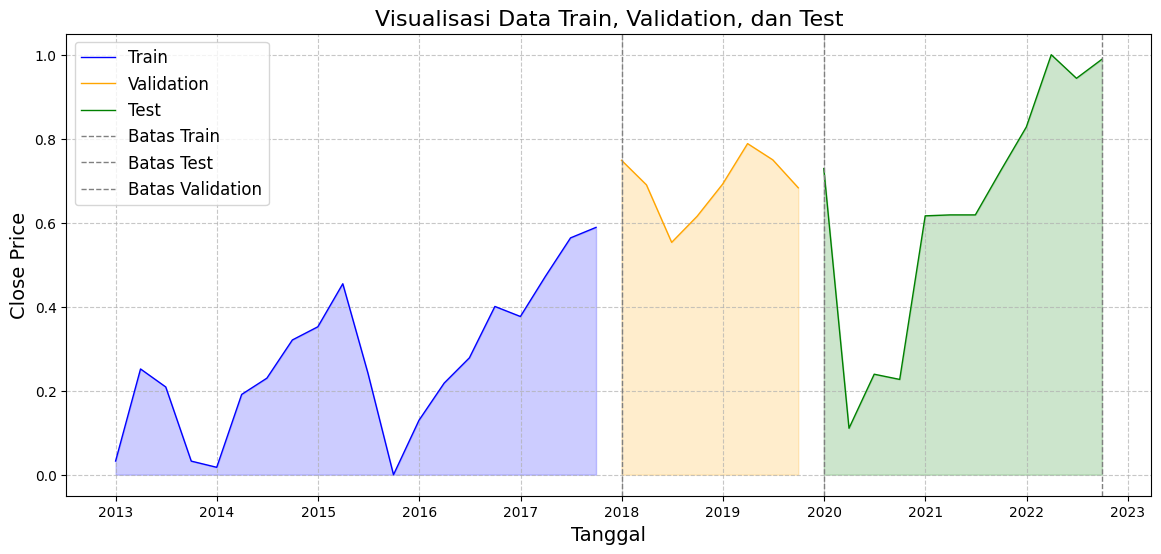

In [35]:
def plot_time_series(train_set, validation_set, test_set):
    # Plot keseluruhan data
    plt.figure(figsize=(14, 6))

    # Plot y_train
    plt.plot(train_set.index, train_set['Close Price'], label='Train', color='blue', linewidth=1)

    # Plot y_val
    plt.plot(validation_set.index, validation_set['Close Price'], label='Validation', color='orange', linewidth=1)

    # Plot y_test
    plt.plot(test_set.index, test_set['Close Price'], label='Test', color='green', linewidth=1)

    # Menambahkan garis vertikal putus-putus sebagai pembatas
    plt.axvline(validation_set.index[-1], color='gray', linestyle='--', linewidth=1, label='Batas Train')
    plt.axvline(test_set.index[0], color='gray', linestyle='--', linewidth=1, label='Batas Test')
    plt.axvline(test_set.index[-1], color='gray', linestyle='--', linewidth=1, label='Batas Validation')

    # Menambahkan label dan judul
    plt.xlabel('Tanggal', fontsize=14)
    plt.ylabel('Close Price', fontsize=14)
    plt.title('Visualisasi Data Train, Validation, dan Test', fontsize=16)
    plt.legend(fontsize=12)

    # Menambahkan grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Menambahkan shadow pada area di bawah kurva
    plt.fill_between(train_set.index, train_set['Close Price'], color='blue', alpha=0.2)
    plt.fill_between(validation_set.index, validation_set['Close Price'], color='orange', alpha=0.2)
    plt.fill_between(test_set.index, test_set['Close Price'], color='green', alpha=0.2)

    plt.show()

# Panggil fungsi plot_time_series dengan dataset yang telah diberikan
plot_time_series(train_set, validation_set, test_set)


### Modelling LSTM

In [36]:
print(X_train.shape)
print(y_train.shape)

(20, 17)
(20,)


In [37]:
import tensorflow as tf

In [38]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 17, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116033 (453.25 KB)
Trainable params: 116033 (453.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.3799 - mse: 0.3799 - val_loss: 0.2581 - val_mse: 0.2581
Epoch 2/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2858 - mse: 0.2858 - val_loss: 0.1805 - val_mse: 0.1805
Epoch 3/100
1/1 [==============================] - 0s 79ms/step - loss: 0.2034 - mse: 0.2034 - val_loss: 0.1097 - val_mse: 0.1097
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 0.1300 - mse: 0.1300 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 5/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0699 - mse: 0.0699 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 6/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 7/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 8/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0854 - mse: 0.0854

In [40]:
y_test_pred = model.predict(X_test)
y_test_pred

1/1 [==============================] - 1s 1s/step


array([[0.5935887 ],
       [0.5863035 ],
       [0.54342073],
       [0.58871037],
       [0.5786213 ],
       [0.57863784],
       [0.57792634],
       [0.5719877 ],
       [0.61039007],
       [0.6291115 ],
       [0.5862802 ],
       [0.6076927 ]], dtype=float32)

In [41]:
# Mengukur kinerja model pada set test
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (Test): {mse_test}')

Mean Squared Error (Test): 0.04976467135780915


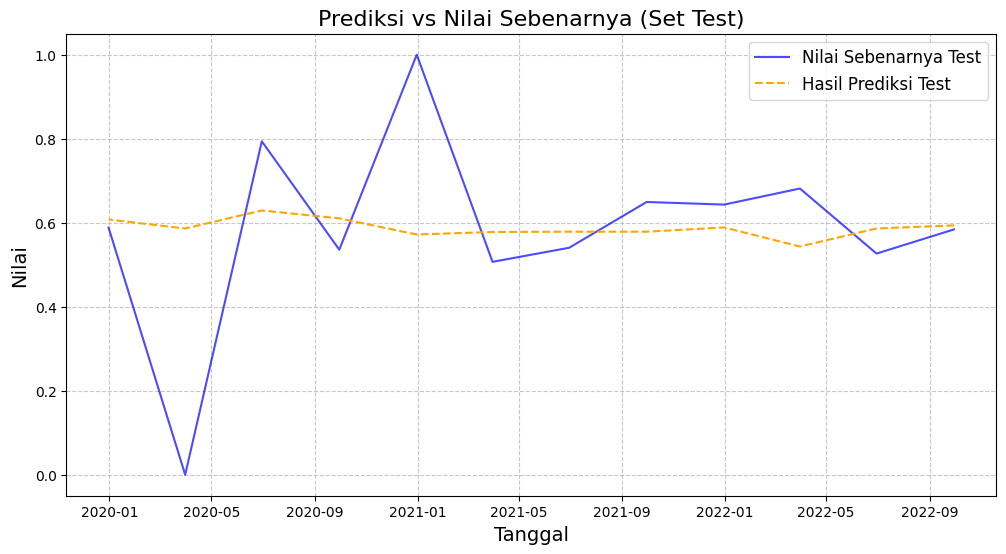

In [42]:
def plot_prediction(y_true, y_pred, dataset_name):
    """
    Plot hasil prediksi dan nilai sebenarnya.

    Parameters:
    - y_true (pandas.Series): Seri nilai sebenarnya.
    - y_pred (pandas.Series): Seri hasil prediksi.
    - dataset_name (str): Nama dataset (contoh: 'Validasi' atau 'Test').

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))

    # Plot nilai sebenarnya
    plt.plot(y_true.index, y_true, label=f'Nilai Sebenarnya {dataset_name}', color='blue', alpha=0.7)

    # Plot hasil prediksi
    plt.plot(y_true.index, y_pred, label=f'Hasil Prediksi {dataset_name}', linestyle='--', color='orange')

    # Menambahkan judul dan label
    plt.title(f'Prediksi vs Nilai Sebenarnya (Set {dataset_name})', fontsize=16)
    plt.xlabel('Tanggal', fontsize=14)
    plt.ylabel('Nilai', fontsize=14)

    # Menambahkan legenda
    plt.legend(fontsize=12)

    # Menambahkan grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Menampilkan plot
    plt.show()


# Panggil fungsi plot_prediction untuk set test
plot_prediction(y_test, y_test_pred, 'Test')


### Mengembalikan ke Data Awal

In [43]:
pred_df = pd.DataFrame(y_test_pred, columns=['Predicted_Column'])

In [44]:
test = X_test.copy()
test.reset_index(drop=True, inplace=True)
test['Y_Prediksi'] = pred_df['Predicted_Column']
test_col = test.columns.tolist()
test_col = test_col[-1:] + test_col[:-1]
test = test[test_col]

In [45]:
# Inverse transform the reshaped pred array
pred_denorm = scaler.inverse_transform(test)


In [46]:
pred_denorm_df = pd.DataFrame(pred_denorm, columns=test.columns)
pred_denorm_df.head()

,Y_Prediksi,Close Price,Volatility 90 Day,Return Sharpe Ratio,Sortino Ratio,Price/Earnings,"Price/Earnings before XO, Positive",Price/Earnings before XO,Price/Cash Flow,Price/Sales,Price/Book Value,Oil Price,Palm Oil Price,Coal Price,BI FX Rate,5Y Bond Yield,10Y Bond Yield,JIBOR 3M
0,0.025797,7040.80,12.73,0.388394,1.333479,16.97,16.97,16.97,16.97,16.97,16.97,87.96,3327.0,295.00,15247.0,6.72,7.37,5.11
1,0.022135,6911.58,15.90,-0.388941,-0.304279,16.63,16.63,16.63,16.63,16.63,16.63,114.81,5088.0,341.65,14848.0,6.13,7.22,3.75
2,0.000582,7071.44,11.14,2.509907,6.146762,30.37,30.37,30.37,30.37,30.37,30.37,107.91,6391.0,254.35,14349.0,5.62,6.74,3.75
3,0.023345,6581.48,11.97,1.528893,3.844474,26.95,26.95,26.95,26.95,26.95,26.95,79.32,5150.0,138.00,14265.0,5.10,6.38,3.75
4,0.018274,6286.94,12.46,1.600953,3.930730,28.61,28.61,28.61,28.61,28.61,28.61,78.52,4833.0,200.50,14307.0,5.14,6.26,3.75


In [47]:
def split_dataset_by_date(df, start_date, end_date):
    return df[(df['Date'] >= start_date) & (df['Date'] < end_date)].set_index('Date')

test_set = split_dataset_by_date(data, '2019-12-01', '2022-12-31')

y_test = test_set.iloc[:,0]

In [48]:
y_test.head()

Date
2022-09-30    0.021002
2022-06-30   -0.007880
2022-03-31    0.069944
2021-12-31    0.050720
2021-09-30    0.053831
Name: 3M Total Return - Last Close, dtype: float64

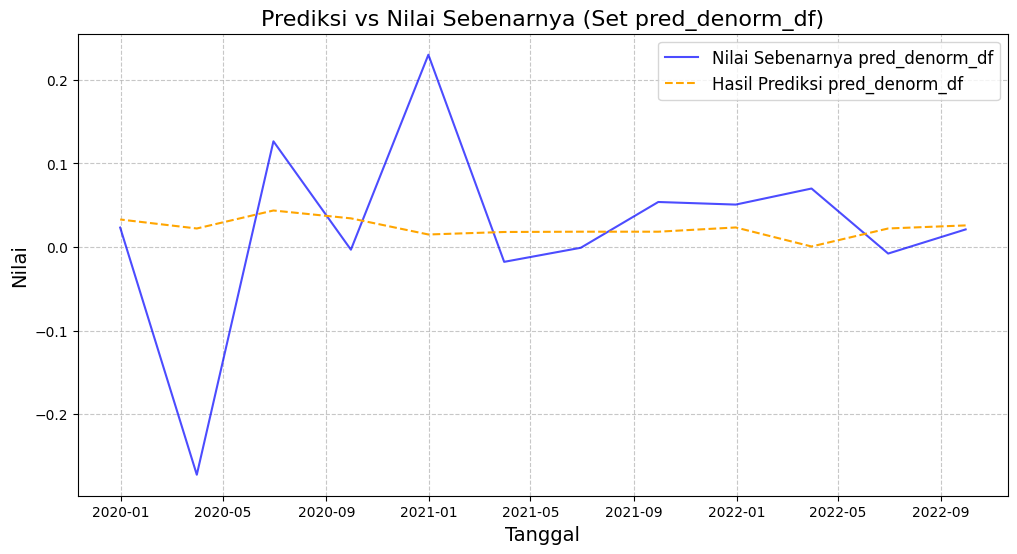

In [49]:
def plot_prediction(y_true, y_pred, dataset_name):
    """
    Plot hasil prediksi dan nilai sebenarnya.

    Parameters:
    - y_true (pandas.Series): Seri nilai sebenarnya.
    - y_pred (pandas.Series): Seri hasil prediksi.
    - dataset_name (str): Nama dataset (contoh: 'Validasi' atau 'Test').

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))

    # Plot nilai sebenarnya
    plt.plot(y_true.index, y_true, label=f'Nilai Sebenarnya {dataset_name}', color='blue', alpha=0.7)

    # Plot hasil prediksi
    plt.plot(y_true.index, y_pred, label=f'Hasil Prediksi {dataset_name}', linestyle='--', color='orange')

    # Menambahkan judul dan label
    plt.title(f'Prediksi vs Nilai Sebenarnya (Set {dataset_name})', fontsize=16)
    plt.xlabel('Tanggal', fontsize=14)
    plt.ylabel('Nilai', fontsize=14)

    # Menambahkan legenda
    plt.legend(fontsize=12)

    # Menambahkan grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Menampilkan plot
    plt.show()


# Panggil fungsi plot_prediction untuk set test
plot_prediction(y_test, pred_denorm_df.Y_Prediksi, 'pred_denorm_df')
